## **1. Principal Component Analysis**

#### Apply PCA on CC dataset.

In [1]:
from google.colab import drive 
drive.mount('/content/gdrive')
path_to_csv = '/content/gdrive/My Drive/datasets/CC GENERAL.csv'
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.decomposition import PCA
#Reading the csv file using pandas
cc = pd.read_csv(path_to_csv)
# Fill null values with mean
cc.fillna(cc.mean(),inplace=True)
cc = cc.drop(['CUST_ID'], axis=1)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# Fit on data
scaler.fit(cc)
# Apply transform on the data
cc_scaler = scaler.transform(cc)
pca = PCA(2)
cc_pca = pca.fit_transform(cc_scaler)
cc_pca_df = pd.DataFrame(data=cc_pca, columns=['PC1','PC2'])
print(cc_pca_df)


           PC1       PC2
0    -1.682220 -1.076449
1    -1.138293  2.506498
2     0.969680 -0.383515
3    -0.873626  0.043171
4    -1.599434 -0.688581
...        ...       ...
8945 -0.359630 -2.016150
8946 -0.564366 -1.639141
8947 -0.926203 -1.810792
8948 -2.336550 -0.657981
8949 -0.556423 -0.400476

[8950 rows x 2 columns]


#### Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?

In [3]:
from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
km = KMeans(n_clusters=nclusters)
km.fit(cc_scaler)

# predict the cluster for each data point
cc_cluster_kmeans = km.predict(cc_scaler)
from sklearn import metrics
score = metrics.silhouette_score(cc_scaler, cc_cluster_kmeans)
print('Silhoutte score on the original data:', score)

Silhoutte score on the original data: 0.25059934300557285


In [4]:
km_pca = KMeans(n_clusters=nclusters)
km_pca.fit(cc_pca)

# predict the cluster for each data point
cc_pca_kmeans = km_pca.predict(cc_pca)

score_pca = metrics.silhouette_score(cc_pca, cc_pca_kmeans)
print('Silhoutte score on the PCA result:', score_pca)

Silhoutte score on the PCA result: 0.45232482021149406


### As we can see, the silhoutte score has improved.

#### Perform Scaling+PCA+K-Means and report performance.

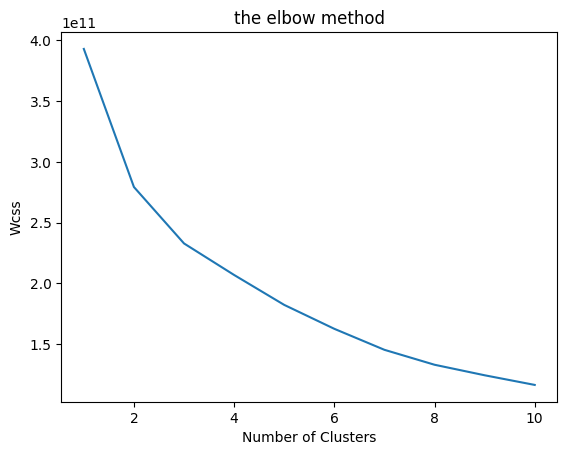

In [5]:
# elbow method to know the number of clusters
import matplotlib.pyplot as plt
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(cc)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

### By seeing the above graph, we can consider k=2 and k=3 to check the performance.

---



In [6]:
# For k = 2
#Reading the csv file using pandas
cc = pd.read_csv(path_to_csv)
cc = cc.drop(['CUST_ID'], axis=1)
cc.fillna(cc.mean(), inplace=True)
scaler = StandardScaler()
# Fit and transform on the data
cc_scaler = scaler.fit_transform(cc)
pca = PCA(2)
cc_pca = pca.fit_transform(cc_scaler)
km = KMeans(n_clusters=2)
km.fit(cc_pca)
cc_pca_kmeans = km.predict(cc_pca)

score = metrics.silhouette_score(cc_pca, cc_pca_kmeans)
# Find accuracy, classification repport and silhoutte score
print('Accuracy:',metrics.accuracy_score(cc_cluster_kmeans,cc_pca_kmeans))
print('Report:',metrics.classification_report(cc_cluster_kmeans,cc_pca_kmeans))
print('Silhoutte score for k=2:', score)

Accuracy: 0.6751955307262569
Report:               precision    recall  f1-score   support

           0       0.80      0.97      0.88      6119
           1       0.08      0.08      0.08      1599
           2       0.00      0.00      0.00      1232

    accuracy                           0.68      8950
   macro avg       0.29      0.35      0.32      8950
weighted avg       0.56      0.68      0.61      8950

Silhoutte score for k=2: 0.4647557458980701


In [7]:
# For k = 3
#Reading the csv file using pandas
cc = pd.read_csv(path_to_csv)
cc = cc.drop(['CUST_ID'], axis=1)
cc.fillna(cc.mean(), inplace=True)
scaler = StandardScaler()
cc_scaler = scaler.fit_transform(cc)
pca = PCA(2)
cc_pca = pca.fit_transform(cc_scaler)
km = KMeans(n_clusters=3)
km.fit(cc_pca)
cc_pca_kmeans = km.predict(cc_pca)

score = metrics.silhouette_score(cc_pca, cc_pca_kmeans)
# Find accuracy, classification repport and silhoutte score
print('Accuracy:',metrics.accuracy_score(cc_cluster_kmeans,cc_pca_kmeans))
print('Report:',metrics.classification_report(cc_cluster_kmeans,cc_pca_kmeans))
print('Silhoutte score for k=3:', score)

Accuracy: 0.6748603351955307
Report:               precision    recall  f1-score   support

           0       0.99      0.99      0.99      6119
           1       0.01      0.01      0.01      1599
           2       0.00      0.00      0.00      1232

    accuracy                           0.67      8950
   macro avg       0.33      0.33      0.33      8950
weighted avg       0.68      0.67      0.68      8950

Silhoutte score for k=3: 0.452324328180543


## **2. Use pd_speech_features.csv**

In [8]:
path = '/content/gdrive/My Drive/datasets/pd_speech_features.csv'
#Reading the csv file using pandas
sf = pd.read_csv(path)
X = sf.iloc[:, 1:-1].values
y = sf.iloc[:, -1].values
scaler = StandardScaler()
sf_scaler = scaler.fit_transform(X)
pca = PCA(3)
sf_pca = pca.fit_transform(sf_scaler)
X_train, X_test, y_train, y_test = train_test_split(sf_pca, y, test_size = 0.2, random_state = 0)
# SVM model
from sklearn.svm import SVC

classifier = SVC()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(metrics.classification_report(y_test, y_pred))
print(metrics.confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52        38
           1       0.83      0.93      0.88       114

    accuracy                           0.80       152
   macro avg       0.75      0.68      0.70       152
weighted avg       0.79      0.80      0.79       152

[[ 16  22]
 [  8 106]]
accuracy is 0.8026315789473685


### **3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2.**

In [9]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
path_to_iris = '/content/gdrive/My Drive/datasets/Iris.csv'
#Reading the csv file using pandas
iris = pd.read_csv(path_to_iris)
x = iris.iloc[:,[1,2,3,4]]
y = iris.iloc[:,-1]
lda = LinearDiscriminantAnalysis(n_components=2)
pca = PCA(n_components=2)
iris_lda = lda.fit_transform(x, y)
iris_pca = pca.fit_transform(x)
iris_lda_df = pd.DataFrame(data=iris_lda, columns=['PC1','PC2'])
iris_lda_df

,PC1,PC2
0,8.084953,0.328454
1,7.147163,-0.755473
2,7.511378,-0.238078
3,6.837676,-0.642885
4,8.157814,0.540639
...,...,...
145,-5.674013,1.661346
146,-5.197129,-0.365506
147,-4.981712,0.812973
148,-5.901486,2.320751


In [10]:
iris_pca_df = pd.DataFrame(data=iris_pca, columns=['PC1','PC2'])
iris_pca_df

,PC1,PC2
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


In [11]:
iris.var()

Id               1887.500000
SepalLengthCm       0.685694
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.582414
dtype: float64

In [12]:
iris.mean()

Id               75.500000
SepalLengthCm     5.843333
SepalWidthCm      3.054000
PetalLengthCm     3.758667
PetalWidthCm      1.198667
dtype: float64

#### As we can see, the absolute values of result of lda are around mean values whereas the absolute values of the results of pca are around the variance.